In [1]:
# Import packages
import numpy as np
curDay = 17

# Download input file
from download_inputs import download_inputs

download_inputs(curDay)

200


In [2]:
# Load input into workspace
filename = f'inputs\\day{curDay}.txt'
# curIn = np.loadtxt(filename)

inputFile = open(filename)
inputs = []
inputs = [s for s in inputFile.read().splitlines()]

print('Done loading input')

Done loading input


In [9]:
# Load test-input into workspace
filenameTest = f'inputs\\day{curDay}test.txt'

inputFileTest = open(filenameTest)
inputsTest = []
inputsTest = [s for s in inputFileTest.read().splitlines()]

print('Done loading test-input') 

Done loading test-input


In [290]:
curIn = inputs[0]
# curIn = inputsTest[0]

In [291]:
allShapes = [
    [
        [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
        [0,0,1,1,1,1,0]
    ],
    [
        [0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0],
        [0,0,1,1,1,0,0],
        [0,0,0,1,0,0,0]
    ],
    [
        [0,0,0,0,0,0,0],
        [0,0,0,0,1,0,0],
        [0,0,0,0,1,0,0],
        [0,0,1,1,1,0,0]
    ],
    [
        [0,0,1,0,0,0,0],
        [0,0,1,0,0,0,0],
        [0,0,1,0,0,0,0],
        [0,0,1,0,0,0,0]
    ],
    [
        [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
        [0,0,1,1,0,0,0],
        [0,0,1,1,0,0,0]
    ]
]

In [292]:
allShapes = [
    np.array([
        [0,0,1,1,1,1,0]
    ]),
    np.array([
        [0,0,0,1,0,0,0],
        [0,0,1,1,1,0,0],
        [0,0,0,1,0,0,0]
    ]),
    np.array([
        [0,0,0,0,1,0,0],
        [0,0,0,0,1,0,0],
        [0,0,1,1,1,0,0]
    ]),
    np.array([
        [0,0,1,0,0,0,0],
        [0,0,1,0,0,0,0],
        [0,0,1,0,0,0,0],
        [0,0,1,0,0,0,0]
    ]),
    np.array([
        [0,0,1,1,0,0,0],
        [0,0,1,1,0,0,0]
    ])
]

In [293]:
iniCham = np.array(
    [
        [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
        [0,0,0,0,0,0,0],
        [2,2,2,2,2,2,2],
    ]
)

In [295]:
# curShape = allShapes[1]
# curCham = iniCham.copy()


def moveDown(curCham): 
    Ys,Xs = np.where(curCham == 1)

    # Try to move down
    newYs = [y+1 for y in Ys]

    allFree = True
    for k in range(len(Ys)):
        
        if (curCham[newYs[k],Xs[k]] == 2):
            allFree = False 
            
    if allFree:
        # Update position, starting from the bottom
        # print(Xs,Ys)
        maxY = np.max(Ys)
        # print(maxY)
        for thisY in range(maxY,-1,-1):
            # print(thisY)
            for k in range(len(Ys)): 
                if (Ys[k] == thisY):
                    curCham[Ys[k],Xs[k]] = 0
                    curCham[newYs[k],Xs[k]] = 1


        # for k in range(len(Ys)):
        #     curCham[Ys[k],Xs[k]] = 0
        #     curCham[newYs[k],Xs[k]] = 1
    else:
        for k in range(len(Ys)):
            curCham[Ys[k],Xs[k]] = 2
    return curCham

# print('--')
# curCham = moveDown(curCham)
# # curCham = moveDown(curCham)
# # curCham = moveDown(curCham)
# print(curCham)

# Loop here

# curCham = np.vstack((curShape,curCham))
# print(curCham)


In [279]:
def moveRight(curCham):
    # Get current coordinates for thing to move
    Ys,Xs = np.where(curCham == 1)

    # If already at the right edge
    if np.any(Xs == 6):
        # Do nothing
        return curCham
    else:
        # Try to move to the right
        newXs = [x+1 for x in Xs]

        allFree = True
        for k in range(len(Ys)):
            if (curCham[Ys[k],newXs[k]] == 2):
                allFree = False 
                

        if allFree:
            # Update position, starting from the right
            maxX = np.max(Xs)
            
            for thisX in range(maxX,-1,-1):
                
                for k in range(len(Xs)): 
                    if (Xs[k] == thisX):
                        curCham[Ys[k],Xs[k]] = 0
                        curCham[Ys[k],newXs[k]] = 1
            
        return curCham
# curCham = moveRight(curCham.copy())
# curCham 

In [296]:
def moveLeft(curCham):
    # Get current coordinates for thing to move
    Ys,Xs = np.where(curCham == 1)

    # If already at the left edge
    if np.any(Xs == 0):
        # Do nothing
        return curCham
    else:
        # Try to move to the left
        newXs = [x-1 for x in Xs]

        allFree = True
        for k in range(len(Ys)):
            if (curCham[Ys[k],newXs[k]] == 2):
                allFree = False 
                

        if allFree:
            # Update position, starting from the left
            maxX = np.max(Xs)
            
            # for thisX in range(maxX,-1,-1):
            for thisX in range(maxX+1):
                
                for k in range(len(Xs)): 
                    if (Xs[k] == thisX):
                        curCham[Ys[k],Xs[k]] = 0
                        curCham[Ys[k],newXs[k]] = 1
            
        return curCham
        

In [311]:
numJets = len(curIn)
# curIn
def getJet(n):
    # print(n%40)
    return curIn[n%numJets]
# print(curIn)
# getJet(40)
toApp = ''
for k in range(90):
    toApp += getJet(k)
# curIn[39]
# toApp[40:]

In [340]:
# curCham[0] == 0
firstNonEmpty = 0
for r in range(len(curCham)-1,0,-1):
    if (np.all(curCham[r] == 0) == False):
        firstNonEmpty = r

    # print(np.all(curCham[r] == 0))
    2+2
# curCham = 
# curCham[firstNonEmpty-3:]
# emptyRow = np.array([0,0,0,0,0,0,0])
# np.vstack((emptyRow,curCham))

In [343]:
# curCham

In [325]:

curCham = iniCham.copy() 
numShapesToAdd = 10
airJetNum = 0
numJets = len(inputs[0])
for s in range(numShapesToAdd):
# for s in tqdm(range(numShapesToAdd)):
    if s > 1:
        # Start by trimming empty lines on top
        firstNonEmpty = 0
        for r in range(len(curCham)-1,0,-1):
            if (np.all(curCham[r] == 0) == False):
                firstNonEmpty = r
        # Trim, but leave three empty rows
        curCham = curCham[firstNonEmpty-3:]

    # Get the next shape to add
    curShape = allShapes[s%5]
    # Add it to the chamber 
    curCham = np.vstack((curShape,curCham))
    print(curCham)

[[0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 1 1 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 1 1 1 1 0]
 [0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [2 2 2 2 2 2 2]]
[[0 0 1 1 0 0 0]
 [0 0 1 1 0 0 0]
 [0 0 0 1 0 0 0]
 [2 2 2 2 2 2 2]]


In [350]:
# curIn
from tqdm import tqdm 

curCham = iniCham.copy() 

curIn = inputs[0]
# curIn = inputsTest[0]
numJets = len(curIn)

numShapesToAdd = 2022
# numShapesToAdd = 40
airJetNum = 0
# numJets = len(curIn)
# numJets = len(inputsTest[0])
# numJets = len(inputs[0])
# for s in range(numShapesToAdd):
for s in tqdm(range(numShapesToAdd)):
    if s > 1:
        # Start by trimming empty lines on top
        firstNonEmpty = 0
        for r in range(len(curCham)-1,0,-1):
            if (np.all(curCham[r] == 0) == False):
                firstNonEmpty = r
        # Trim, but leave three empty rows
        curCham = curCham[firstNonEmpty-3:]

    # Get the next shape to add
    curShape = allShapes[s%5]
    # Add it to the chamber 
    curCham = np.vstack((curShape,curCham))

    # print(curCham)
    maxIter = 40
    for curIter in range(maxIter):
    # flagContinueIter = True 
    # while flagContinueIter:
        # If there are still parts that haven't moved
        if np.any(curCham == 1):
            # Get the next air jet
            curAir = curIn[airJetNum % numJets]
            # curAir = inputsTest[0][airJetNum % numJets] 
            # curAir = inputs[0][airJetNum % numJets] 
            airJetNum += 1 

            # print(curAir,airJetNum)
            if curAir == '>':
                curCham = moveRight(curCham.copy())
            elif curAir == '<':
                curCham = moveLeft(curCham.copy())
            # print(curCham)
         
            # print('---')
            # print('Moving down')

            curCham = moveDown(curCham.copy())

            # print(curCham)

            # print('---')
        # else:
        #     flagContinueIter = False
    # print('NEXT')
    # print(curCham)

100%|██████████| 2022/2022 [01:40<00:00, 20.07it/s]


In [332]:
# inputs[0]
# curCham[0:100]

In [351]:
p1 = curCham.shape[0]-4
print(p1)
# # curCham[:5]
# curCham

3065


# Part 2: 1000000000000 rocks
Gotta find repetitions

Test-case: 1514285714288 units tall

In [358]:
len(curIn) * 5
# curCham[50455]
len(curCham)

3069

In [368]:
# curIn
from tqdm import tqdm 

curCham = iniCham.copy() 

curIn = inputs[0]
curIn = inputsTest[0]
numJets = len(curIn)

numShapesToAdd = 20220
# numShapesToAdd = 40
airJetNum = 0


curCount = 0
# for s in range(numShapesToAdd):
for s in tqdm(range(numShapesToAdd)):
    if s > 1:
        # Start by trimming empty lines on top
        firstNonEmpty = 0
        for r in range(len(curCham)-1,0,-1):
            if (np.all(curCham[r] == 0) == False):
                firstNonEmpty = r
        # Trim, but leave three empty rows
        curCham = curCham[firstNonEmpty-3:]

    # Get the next shape to add
    curShape = allShapes[s%5]
    # Add it to the chamber 
    curCham = np.vstack((curShape,curCham))

    # print()
    hasMoved = False 
    

    # print(curCham)
    maxIter = 40
    for curIter in range(maxIter):
    # flagContinueIter = True 
    # while flagContinueIter:
        # If there are still parts that haven't moved
        if np.any(curCham == 1):
            # Part 2:
            if (airJetNum % numJets) == 0:
                if (s%5) == 0:
                    if hasMoved == False:
                        print('Added air jet number',airJetNum,'we were at the start of shape 0')
            

            # Get the next air jet
            curAir = curIn[airJetNum % numJets]
            # curAir = inputsTest[0][airJetNum % numJets] 
            # curAir = inputs[0][airJetNum % numJets] 
            airJetNum += 1 

            # print(curAir,airJetNum)
            if curAir == '>':
                curCham = moveRight(curCham.copy())
            elif curAir == '<':
                curCham = moveLeft(curCham.copy())
            # print(curCham)

            hasMoved = True
            # print('---')
            # print('Moving down')

            curCham = moveDown(curCham.copy())

            # print(curCham)

            # print('---')
        # else:
        #     flagContinueIter = False
    # print('NEXT')
    # print(curCham)

  1%|          | 112/20220 [00:00<00:47, 421.19it/s]

Added air jet number 0 we were at the start of shape 0


  6%|▌         | 1194/20220 [00:27<07:20, 43.22it/s]


KeyboardInterrupt: 

In [369]:
curIn 

'>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>'

In [374]:
# curCham[:10]
curCham[-2]

array([0, 0, 2, 2, 2, 2, 0])

In [398]:
# 1514285714288


28571428571.4717

In [399]:
len(curCham)

1821

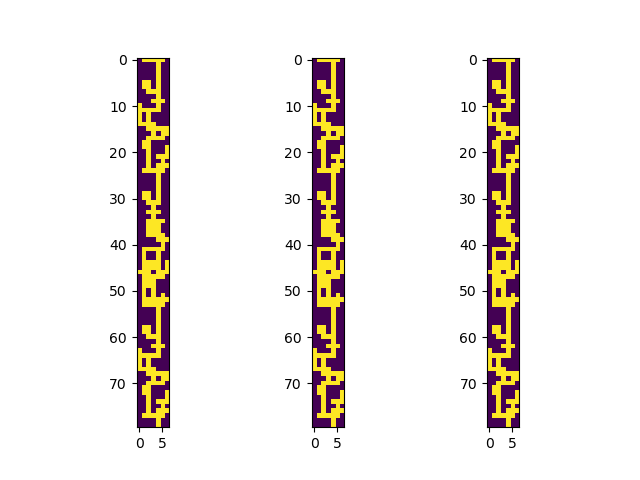

In [406]:
curCham[:100]

import matplotlib.pyplot as plt
%matplotlib widget
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
offSet = 53
# offSet = 29
ax1.imshow(curCham[10:90])
ax2.imshow(curCham[10+offSet:90+offSet])
ax3.imshow(curCham[10:90]+curCham[10+offSet:90+offSet])

# Old below

In [140]:
# def moveRight(curCham):
#     # Get current coordinates for thing to move
#     Ys,Xs = np.where(curCham == 1)

#     # If already at the right edge
#     if np.any(Xs == 6):
#         # Do nothing?
#         return curCham
#     else:
#         # Try to move to the right
#         newXs = [x+1 for x in Xs]

#         allFree = True
#         for k in range(len(Ys)):
#             # print(Xs[k],Ys[k])
#             # print(newXs[k],Ys[k]) 
#             # print(curCham[Ys[k],newXs[k]])
#             if (curCham[Ys[k],newXs[k]] == 2):
#                 allFree = False 
#         # print(allFree)

#         if allFree:
#             # Update position
#             # Update position, starting from the right
#             # print(Xs,Ys)
#             maxX = np.max(Xs)
#             # print(maxY)
#             for thisX in range(maxX,-1,-1):
#                 # print(thisY)
#                 for k in range(len(Xs)): 
#                     if (Xs[k] == thisX):
#                         curCham[Ys[k],Xs[k]] = 0
#                         curCham[Ys[k],newXs[k]] = 1
            
#             # for k in range(len(Ys)):
#             #     curCham[Ys[k],Xs[k]] = 0
#             #     curCham[Ys[k],newXs[k]] = 1
#         # else:
#         #     for k in range(len(Ys)):
#         #         curCham[Ys[k],Xs[k]] = 2
#         return curCham
# curCham = moveRight(curCham.copy())
# curCham 

In [ ]:
# def moveRight(curCham):
#     # Get current coordinates for thing to move
#     Ys,Xs = np.where(curCham == 1)

#     # If already at the right edge
#     if np.any(Xs == 6):
#         # Do nothing?
#         return curCham
#     else:
#         # Try to move to the right
#         newXs = [x+1 for x in Xs]

#         allFree = True
#         for k in range(len(Ys)):
#             # print(Xs[k],Ys[k])
#             # print(newXs[k],Ys[k]) 
#             # print(curCham[Ys[k],newXs[k]])
#             if (curCham[Ys[k],newXs[k]] == 2):
#                 allFree = False 
#         # print(allFree)

#         if allFree:
#             # Update position
#             # Update position, starting from the right
#             # print(Xs,Ys)
#             maxX = np.max(Xs)
#             # print(maxY)
#             for thisX in range(maxX,-1,-1):
#                 # print(thisY)
#                 for k in range(len(Xs)): 
#                     if (Xs[k] == thisX):
#                         curCham[Ys[k],Xs[k]] = 0
#                         curCham[Ys[k],newXs[k]] = 1
            
#             # for k in range(len(Ys)):
#             #     curCham[Ys[k],Xs[k]] = 0
#             #     curCham[Ys[k],newXs[k]] = 1
#         # else:
#         #     for k in range(len(Ys)):
#         #         curCham[Ys[k],Xs[k]] = 2
#         return curCham
# curCham = moveRight(curCham.copy())
# curCham 

In [132]:
# curShape = allShapes[1]
# curCham = iniCham.copy()


# # Loop here
# curTop = curCham.shape[0]

# curCham = np.vstack((curShape,curCham))
# print(curCham,curTop)

# # for r in range(len(curCham)-1,-1,-1):
# #     # print(curCham[r])
# #     curRow = curCham[r]
# #     for c in curRow:
# #         if (c == 1):

# def moveDown(curCham): 
#     Ys,Xs = np.where(curCham == 1)

#     # Try to move down
#     newYs = [y+1 for y in Ys]

#     allFree = True
#     for k in range(len(Ys)):
#     #     print(Xs[k],Ys[k])
#         # print(Xs[k],newYs[k]) 
#         # print(curCham[newYs[k],Xs[k]])
#         if (curCham[newYs[k],Xs[k]] == 2):
#             allFree = False 
#     # print(allFree)

#     if allFree:
#         # Update position
#         for k in range(len(Ys)):
#             curCham[Ys[k],Xs[k]] = 0
#             curCham[newYs[k],Xs[k]] = 1
#     else:
#         for k in range(len(Ys)):
#             curCham[Ys[k],Xs[k]] = 2
#     return curCham


# # def moveRight(curCham): 
# #     # Get current coordinates for thing to move
# #     Ys,Xs = np.where(curCham == 1)

# #     # 

# #     # Try to move to the right
# #     newXs = [x+1 for x in Xs]

# #     allFree = True
# #     for k in range(len(Ys)):
# #     #     print(Xs[k],Ys[k])
# #         # print(Xs[k],newYs[k]) 
# #         # print(curCham[newYs[k],Xs[k]])
# #         if (curCham[newYs[k],Xs[k]] != 0):
# #             allFree = False 
# #     # print(allFree)

# #     if allFree:
# #         # Update position
# #         for k in range(len(Ys)):
# #             curCham[Ys[k],Xs[k]] = 0
# #             curCham[newYs[k],Xs[k]] = 1
# #     else:
# #         for k in range(len(Ys)):
# #             curCham[Ys[k],Xs[k]] = 2
# #     return curCham

# print('--')
# curCham = moveDown(curCham)
# print(curCham)

In [116]:

Ys,Xs = np.where(curCham == 1)
print(Xs,Ys)

[2 3 4 5] [1 1 1 1]


In [114]:
def moveRight(curCham):
    # Get current coordinates for thing to move
    Ys,Xs = np.where(curCham == 1)

    # If already at the right edge
    if np.any(Xs == 6):
        # Do nothing?
        return curCham
    else:
        # Try to move to the right
        newXs = [x+1 for x in Xs]

        allFree = True
        for k in range(len(Ys)):
            # print(Xs[k],Ys[k])
            # print(newXs[k],Ys[k]) 
            # print(curCham[Ys[k],newXs[k]])
            if (curCham[Ys[k],newXs[k]] == 2):
                allFree = False 
        # print(allFree)

        if allFree:
            # Update position
            
            for k in range(len(Ys)):
                curCham[Ys[k],Xs[k]] = 0
                curCham[Ys[k],newXs[k]] = 1
        # else:
        #     for k in range(len(Ys)):
        #         curCham[Ys[k],Xs[k]] = 2
        return curCham
moveRight(curCham.copy())

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2, 2, 2]])